### Authentication



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
!ls

gdrive	sample_data


In [ ]:
!mkdir PdM_Another


In [ ]:
cd PdM_Another/

/content/PdM_Another


In [ ]:
!ls

### Data Ingestion



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
########################## FINAL TRAINING DATASET #############################################
train_df = pd.read_csv('final_dataFramex.csv', delimiter=',')
print("Size of training data", train_df.shape)

train_df[['datetime', 'machineID']]

Size of training data (291628, 30)


,datetime,machineID
0,1/2/2015 5:00:00 AM,1
1,1/2/2015 8:00:00 AM,1
2,1/2/2015 11:00:00 AM,1
3,1/2/2015 2:00:00 PM,1
4,1/2/2015 5:00:00 PM,1
...,...,...
291623,12/31/2015 5:00:00 PM,100
291624,12/31/2015 8:00:00 PM,100
291625,12/31/2015 11:00:00 PM,100
291626,1/1/2016 2:00:00 AM,100


### Sample of Training Data



Features

- Datetime: The timestample of record
- MachineID: The information ID of machine
- Volmean_3hrs: The mean value of voltage in lag-window of 3 hours
- Rotatemean_3hrs: The mean value of rotation in lag-window of 3 hours
- Pressuremean_3hrs: The mean value of rotation in lag-window of 3 hours
- Vibrationmean_3hrs: The mean value of vibration in lag-window of 3 hours
- Voltsd_3hrs: The standard value of voltage in lag-window of 3 hours
- Rotatesd_3hrs: The standard value of rotation in lag-window of 3 hours
- 

### Data Label For Predictive Maintenance

Depend on the our target, we will define the next-24 hours for prediction.

In [7]:
train_df.columns

Index(['datetime', 'machineID', 'voltmean_3hrs', 'rotatemean_3hrs',
       'pressuremean_3hrs', 'vibrationmean_3hrs', 'voltsd_3hrs',
       'rotatesd_3hrs', 'pressuresd_3hrs', 'vibrationsd_3hrs',
       'voltmean_24hrs', 'rotatemean_24hrs', 'pressuremean_24hrs',
       'vibrationmean_24hrs', 'voltsd_24hrs', 'rotatesd_24hrs',
       'pressuresd_24hrs', 'vibrationsd_24hrs', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'sincelastcomp1',
       'sincelastcomp2', 'sincelastcomp3', 'sincelastcomp4', 'model', 'age',
       'failure'],
      dtype='object')

In [8]:
b = train_df
b

,datetime,machineID,voltmean_3hrs,rotatemean_3hrs,pressuremean_3hrs,vibrationmean_3hrs,voltsd_3hrs,rotatesd_3hrs,pressuresd_3hrs,vibrationsd_3hrs,...,error3count,error4count,error5count,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure
0,1/2/2015 5:00:00 AM,1,180.133789,440.608337,94.137970,41.551544,180.133789,440.608337,94.137970,41.551544,...,0,0,0,19.958333,214.958333,154.958333,169.958333,model3,18,none
1,1/2/2015 8:00:00 AM,1,176.364288,439.349640,101.553207,36.105579,176.364288,439.349640,101.553207,36.105579,...,0,0,0,20.083333,215.083333,155.083333,170.083333,model3,18,none
2,1/2/2015 11:00:00 AM,1,160.384567,424.385315,99.598724,36.094639,160.384567,424.385315,99.598724,36.094639,...,0,0,0,20.208333,215.208333,155.208333,170.208333,model3,18,none
3,1/2/2015 2:00:00 PM,1,170.472458,442.933990,102.380585,40.483002,170.472458,442.933990,102.380585,40.483002,...,0,0,0,20.333333,215.333333,155.333333,170.333333,model3,18,none
4,1/2/2015 5:00:00 PM,1,163.263809,468.937561,102.726646,40.921803,163.263809,468.937561,102.726646,40.921803,...,0,0,0,20.458333,215.458333,155.458333,170.458333,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291623,12/31/2015 5:00:00 PM,100,177.758759,458.391632,103.183159,46.846592,177.758759,458.391632,103.183159,46.846592,...,0,0,0,82.458333,7.458333,82.458333,52.458333,model4,5,none
291624,12/31/2015 8:00:00 PM,100,166.078949,424.431183,98.344414,30.907459,166.078949,424.431183,98.344414,30.907459,...,0,0,0,82.583333,7.583333,82.583333,52.583333,model4,5,none
291625,12/31/2015 11:00:00 PM,100,158.327988,504.056274,108.055443,40.109707,158.327988,504.056274,108.055443,40.109707,...,0,0,0,82.708333,7.708333,82.708333,52.708333,model4,5,none
291626,1/1/2016 2:00:00 AM,100,170.306961,438.653625,102.346230,47.481232,170.306961,438.653625,102.346230,47.481232,...,0,0,0,82.833333,7.833333,82.833333,52.833333,model4,5,none


- Convert ```Failure``` to ```[0,1]``` for BinaryClassification

In [9]:
#b=train_df.drop(['model'], axis=1)
b = train_df
b['label1']= np.where(b['failure'] == 'none', 0, 1)
#a['label1'][0]
for i in range (0, train_df.shape[0]):
  if b['failure'][i] == 'none':
    b['label1'][i] = 0
  else:
    b['label1'][i] = 1

D:\Anaconda3\envs\quanap5\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\envs\quanap5\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


- Add new ```Label2``` and ```Label3``` with for in-advance predict ```W01 = 8 ~ 24 hours```

In [10]:
b['label2']=-1
for  i in range (0, b.shape[0]):
  if b['label1'][i] == 1:
    rul = 0
    b['label2'][i] = rul
    for j in reversed(range(i)):
      if (b['label1'][j] !=1 and b['machineID'][j] == b['machineID'][i]):
        rul = rul +1
        b['label2'][j] = rul
      else:
        break

w01 = 8
b['label3']=0
b.loc[train_df['label2'] <= w01, 'label3'] = 1
b.loc[train_df['label2'] == -1, 'label3'] = 0
b

D:\Anaconda3\envs\quanap5\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda3\envs\quanap5\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,datetime,machineID,voltmean_3hrs,rotatemean_3hrs,pressuremean_3hrs,vibrationmean_3hrs,voltsd_3hrs,rotatesd_3hrs,pressuresd_3hrs,vibrationsd_3hrs,...,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure,label1,label2,label3
0,1/2/2015 5:00:00 AM,1,180.133789,440.608337,94.137970,41.551544,180.133789,440.608337,94.137970,41.551544,...,19.958333,214.958333,154.958333,169.958333,model3,18,none,0,17,0
1,1/2/2015 8:00:00 AM,1,176.364288,439.349640,101.553207,36.105579,176.364288,439.349640,101.553207,36.105579,...,20.083333,215.083333,155.083333,170.083333,model3,18,none,0,16,0
2,1/2/2015 11:00:00 AM,1,160.384567,424.385315,99.598724,36.094639,160.384567,424.385315,99.598724,36.094639,...,20.208333,215.208333,155.208333,170.208333,model3,18,none,0,15,0
3,1/2/2015 2:00:00 PM,1,170.472458,442.933990,102.380585,40.483002,170.472458,442.933990,102.380585,40.483002,...,20.333333,215.333333,155.333333,170.333333,model3,18,none,0,14,0
4,1/2/2015 5:00:00 PM,1,163.263809,468.937561,102.726646,40.921803,163.263809,468.937561,102.726646,40.921803,...,20.458333,215.458333,155.458333,170.458333,model3,18,none,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291623,12/31/2015 5:00:00 PM,100,177.758759,458.391632,103.183159,46.846592,177.758759,458.391632,103.183159,46.846592,...,82.458333,7.458333,82.458333,52.458333,model4,5,none,0,-1,0
291624,12/31/2015 8:00:00 PM,100,166.078949,424.431183,98.344414,30.907459,166.078949,424.431183,98.344414,30.907459,...,82.583333,7.583333,82.583333,52.583333,model4,5,none,0,-1,0
291625,12/31/2015 11:00:00 PM,100,158.327988,504.056274,108.055443,40.109707,158.327988,504.056274,108.055443,40.109707,...,82.708333,7.708333,82.708333,52.708333,model4,5,none,0,-1,0
291626,1/1/2016 2:00:00 AM,100,170.306961,438.653625,102.346230,47.481232,170.306961,438.653625,102.346230,47.481232,...,82.833333,7.833333,82.833333,52.833333,model4,5,none,0,-1,0


In [12]:
from sklearn import preprocessing
b.columns
cols_normalize = b.columns.difference(['datetime','machineID','model','age','failure', 'label1', 'label2', 'label3'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_b = pd.DataFrame(min_max_scaler.fit_transform(b[cols_normalize]), columns= cols_normalize, index=b.index)
join_df = b[b.columns.difference(cols_normalize)].join(norm_b)
b = join_df.reindex(columns = b.columns)
b.head(2)

,datetime,machineID,voltmean_3hrs,rotatemean_3hrs,pressuremean_3hrs,vibrationmean_3hrs,voltsd_3hrs,rotatesd_3hrs,pressuresd_3hrs,vibrationsd_3hrs,...,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure,label1,label2,label3
0,1/2/2015 5:00:00 AM,1,0.471155,0.610335,0.244141,0.350522,0.471155,0.610335,0.244141,0.350522,...,0.040407,0.615908,0.417594,0.430199,model3,18,none,0,17,0
1,1/2/2015 8:00:00 AM,1,0.438628,0.606977,0.326358,0.223106,0.438628,0.606977,0.326358,0.223106,...,0.040661,0.616267,0.417931,0.430516,model3,18,none,0,16,0


### Save Training dataset to CSV

In [13]:
from google.colab import files
b
b.to_csv('demo2.csv')

ModuleNotFoundError: No module named 'google.colab'

In [14]:
b.head()

,datetime,machineID,voltmean_3hrs,rotatemean_3hrs,pressuremean_3hrs,vibrationmean_3hrs,voltsd_3hrs,rotatesd_3hrs,pressuresd_3hrs,vibrationsd_3hrs,...,sincelastcomp1,sincelastcomp2,sincelastcomp3,sincelastcomp4,model,age,failure,label1,label2,label3
0,1/2/2015 5:00:00 AM,1,0.471155,0.610335,0.244141,0.350522,0.471155,0.610335,0.244141,0.350522,...,0.040407,0.615908,0.417594,0.430199,model3,18,none,0,17,0
1,1/2/2015 8:00:00 AM,1,0.438628,0.606977,0.326358,0.223106,0.438628,0.606977,0.326358,0.223106,...,0.040661,0.616267,0.417931,0.430516,model3,18,none,0,16,0
2,1/2/2015 11:00:00 AM,1,0.300739,0.567058,0.304688,0.222850,0.300739,0.567058,0.304688,0.222850,...,0.040915,0.616625,0.418268,0.430833,model3,18,none,0,15,0
3,1/2/2015 2:00:00 PM,1,0.387787,0.616538,0.335532,0.325522,0.387787,0.616538,0.335532,0.325522,...,0.041169,0.616983,0.418605,0.431149,model3,18,none,0,14,0
4,1/2/2015 5:00:00 PM,1,0.325584,0.685905,0.339369,0.335789,0.325584,0.685905,0.339369,0.335789,...,0.041423,0.617341,0.418942,0.431466,model3,18,none,0,13,0


### Training Data Frame

This is to prepare data for training phase.

In [15]:
#define function generate sequence
def gen_sequence(id_df,seq_length, seq_cols):
  data_matrix = id_df[seq_cols].values
  num_elements = data_matrix.shape[0]
  #print(data_matrix)
  print("number of elements of current machine ID: "+ str(num_elements))
  for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
    yield data_matrix[start:stop, :]


#identity the name of column
sequence_length = 56
sequence_cols = b.columns.drop(['datetime','machineID', 'machineID','model', 'failure', 'label1', 'label2', 'label3']) 

#generate sequence
seq_gen = (list(gen_sequence(b[b.machineID==id], sequence_length, sequence_cols)) for id in b.machineID.unique())

#generate array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

number of elements of current machine ID: 2913
number of elements of current machine ID: 2921
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2921
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2921
number of elements of current machine ID: 2921
number of elements of current machine ID: 2937
number of elements of current machine ID: 2913
number of elements of current machine ID: 2929
number of elements of current machine ID: 2921
number of elements of current machine ID: 2929
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2913
number of elements of current machine ID: 2921
number of ele

(286028, 56, 26)

In [ ]:
# function to generate labels
def generate_labels(id_df, seq_length, label):
  data_matrix = id_df[label].values
  num_elements = data_matrix.shape[0]
  return data_matrix[seq_length:num_elements, :]

sequence_length = 56
label_cols = ['label3']
label_gen = [generate_labels(b[b.machineID==id], sequence_length, label_cols) 
             for id in b.machineID.unique()]

label_array = np.concatenate(label_gen).astype(np.float32)

binary_label_array= np.array([])
for x in range(len(label_array)): 
    if (label_array[x] == [0]):
      a =np.array( [1 , 0 ])
      binary_label_array = np.concatenate((binary_label_array, a)).astype(np.float32)
    if (label_array[x] == [1]):
      a = np.array( [0 , 1 ])
      binary_label_array=np.concatenate((binary_label_array, a)).astype(np.float32)

binary_label_array.shape

In [ ]:
binary_label_array= binary_label_array.reshape(-1,2)
binary_label_array.shape

### Predictive Maintenance Model

In [19]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model


#build a model using RNN layer
sequence_length = 56;
nb_features = 26;
nb_out = 2
binaryModel = Sequential()

binaryModel.add(LSTM(input_shape=(sequence_length, nb_features),
                     units=100,
                     return_sequences=True))
#binaryModel.add(Dropout(0.2))
binaryModel.add(LSTM(input_shape=(sequence_length, nb_features),
                     units=50,
                     return_sequences=False))
#binaryModel.add(Dropout(0.2))
# #binaryModel.add(Dropout(0.2))
# binaryModel.add(LSTM(units=25, return_sequences=False))
# #binaryModel.add(Dropout(0.2))

binaryModel.add(Dense(units=nb_out, activation='softmax'))
binaryModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

binaryModel.summary()
plot_model(binaryModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Using TensorFlow backend.
D:\Anaconda3\envs\quanap5\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\quanap5\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\quanap5\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\quanap5\lib\site-packages\tensorflow\python\framework\dtype

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 56, 100)           50800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 81,102
Trainable params: 81,102
Non-trainable params: 0
_________________________________________________________________


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [ ]:
history = binaryModel.fit(seq_array, binary_label_array, epochs=30, batch_size=200, validation_split=0.05, verbose=1)

Train on 271726 samples, validate on 14302 samples
Epoch 1/30
271726/271726 [==============================] - 267s 983us/step - loss: 0.1086 - accuracy: 0.9685 - val_loss: 0.1095 - val_accuracy: 0.9638
Epoch 2/30
271726/271726 [==============================] - 262s 962us/step - loss: 0.0842 - accuracy: 0.9735 - val_loss: 0.1350 - val_accuracy: 0.9557
Epoch 3/30
271726/271726 [==============================] - 260s 956us/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.0920 - val_accuracy: 0.9697
Epoch 4/30
271726/271726 [==============================] - 258s 950us/step - loss: 0.0708 - accuracy: 0.9775 - val_loss: 0.0876 - val_accuracy: 0.9695
Epoch 5/30
271726/271726 [==============================] - 270s 994us/step - loss: 0.0655 - accuracy: 0.9785 - val_loss: 0.0969 - val_accuracy: 0.9675
Epoch 6/30
271726/271726 [==============================] - 269s 991us/step - loss: 0.0612 - accuracy: 0.9798 - val_loss: 0.0880 - val_accuracy: 0.9703
Epoch 7/30
271726/271726 [===========

### Model evaluation



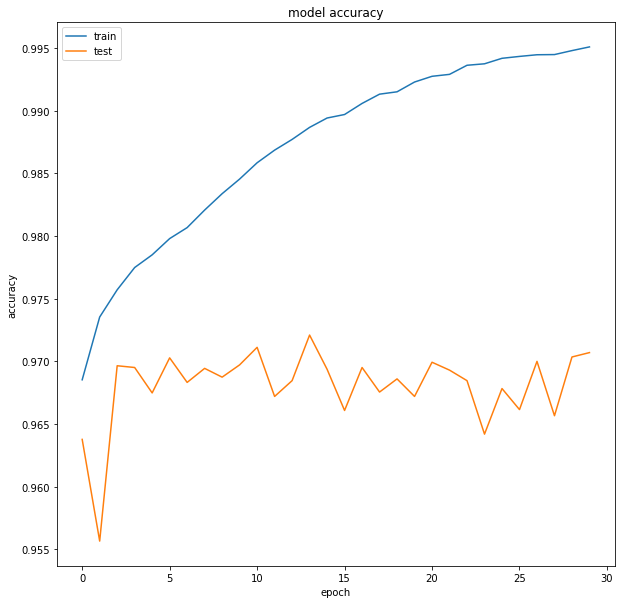

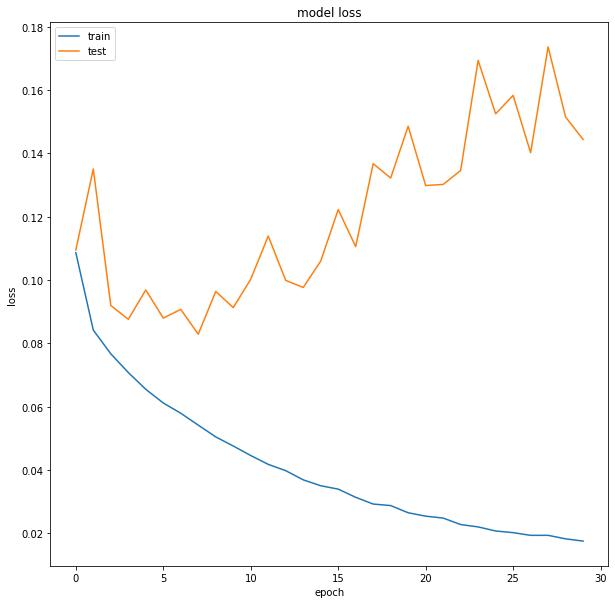

In [ ]:
# summarize history for Accuracy
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_accuracy.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_loss.png")

In [ ]:
# training metrics
scores = binaryModel.evaluate(seq_array, binary_label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

286028/286028 [==============================] - 27s 95us/step
Accurracy: 0.9678982496261597


In [ ]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
# make predictions and compute confusion matrix
y_pred = binaryModel.predict_classes(seq_array,verbose=1, batch_size=200)
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(m)
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

286028/286028 [==============================] - 26s 92us/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[273942,    834],
       [  8348,   2904]])

In [ ]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

precision =  0.7768860353130016 
 recall =  0.2580874511198009
